In [3]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import nltk
plt.style.use('ggplot')



In [4]:
df = pd.read_csv('Reviews.csv')

In [5]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [6]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [7]:
df= df.head(500)

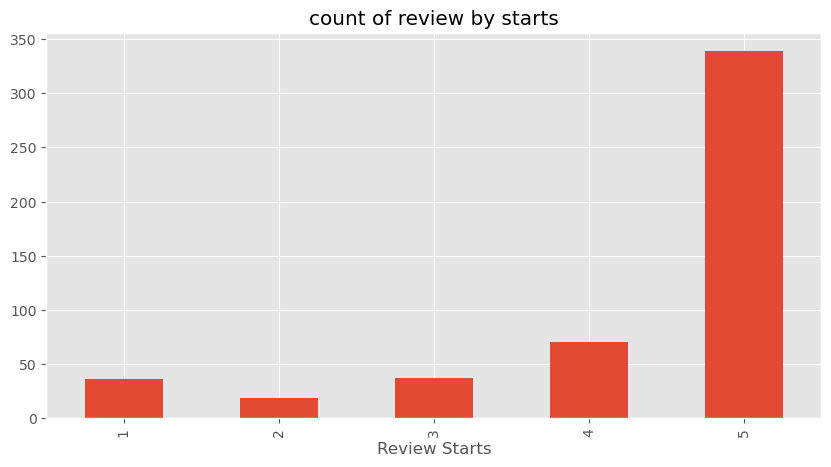

In [8]:
#EDA

#df['Score'].value_counts()#this gives the number of times each score occurs
ax= df['Score'].value_counts().sort_index()\
    .plot(kind='bar',
    title='count of review by starts',
    figsize=(10,5))

ax.set_xlabel('Review Starts')
plt.show()

In [9]:
#basic nltk

example= df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [12]:

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:
entities=nltk.chunk.ne_chunk(tagged)#it will gorup the tokens into groups of text
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## 1- sentiment analysis using VADER
(valence aware dictionary and sentiment reasoner)  bag of words approach
1- stop words are removed
2- each word is scored and combined to a total score

it have a value of either positive, negative or neutral for each word in the sentence. it will combine all the words of a sentence and tell that how positive , negativ or neutral the statement is. this approach does not account for relationship between words


In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


SentimentAnalyzerObject = SentimentIntensityAnalyzer()

In [16]:
SentimentAnalyzerObject.polarity_scores("I am so Happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [17]:
SentimentAnalyzerObject.polarity_scores("t am very sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [18]:
SentimentAnalyzerObject.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [19]:
#run the polarity score on the enitre dataset

results={}
for i, row in tqdm(df.iterrows(),total=len(df)):  #here i is the index of an element on df and  row is the content of that element
    text=row['Text']
    myid = row['Id']
    results[myid]=SentimentAnalyzerObject.polarity_scores(text)
   

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:


# Assuming you already have the 'results' dictionary with sentiment scores
vaders = pd.DataFrame(results).T  # Transpose the DataFrame to change orientation
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # Reset index and rename column to 'Id'
vaders = vaders.merge(df, on='Id', how='left')  # Merge sentiment DataFrame with original DataFrame based on 'Id'

# Now 'vaders' DataFrame contains sentiment scores and original data, merged on 'Id'


In [21]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'compound scores by amazon star review')

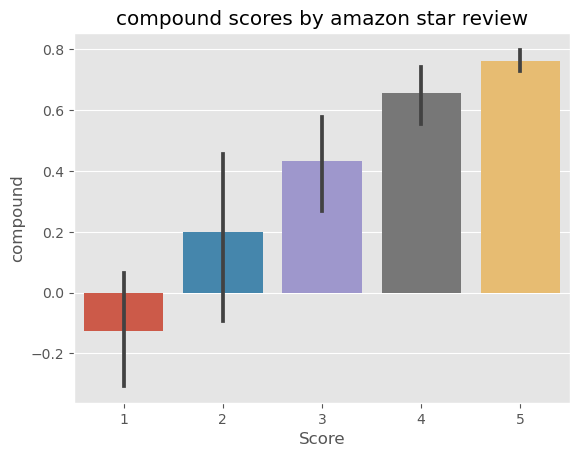

In [22]:
ax= sns.barplot(data=vaders,x='Score',y = 'compound')
ax.set_title('compound scores by amazon star review')


Text(0.5, 1.0, 'neutral')

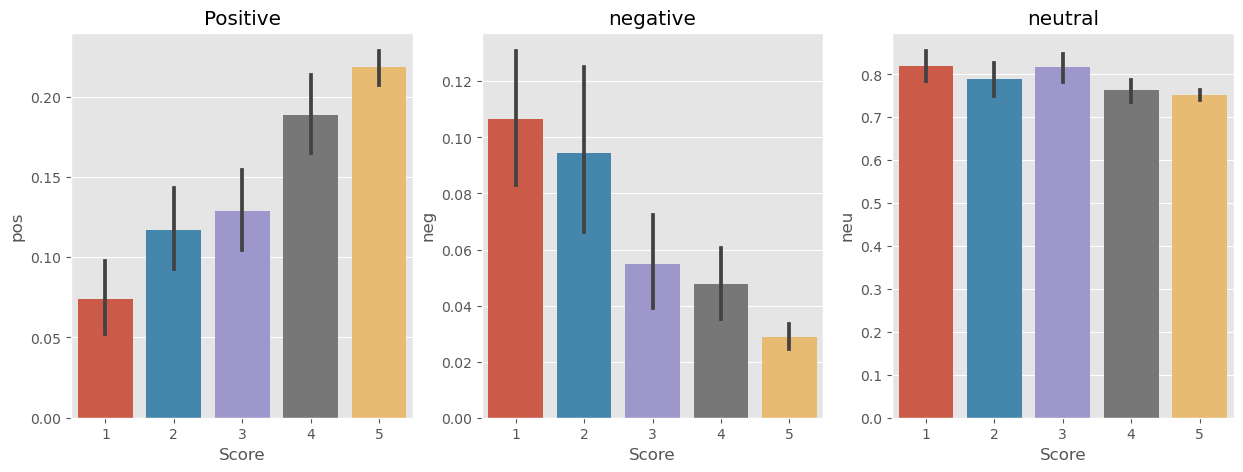

In [23]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('negative')
axs[2].set_title('neutral')

## roberta pretrained model
1- use model trained of a large corpus of data
2- transformer model accounts for teh words but also the context related to other words 

(deep learning model)
use hugging face

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch


In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
CACHE_DIR = "/path/to/cache/directory"  # Specify the directory where the model weights are cached

# Load tokenizer from cache
tokenizer = AutoTokenizer.from_pretrained(MODEL, cache_dir=CACHE_DIR)

# Load model from cache
model = AutoModelForSequenceClassification.from_pretrained(MODEL, cache_dir=CACHE_DIR)


In [30]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [32]:
#run for Roberta model
encodded_text=tokenizer(example,return_tensors='pt')

In [33]:
output= model(**encodded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores
scores_dict={
    'roberta_neg':scores[0],
     'roberta_neu':scores[1],
      'roberta_pos':scores[2]

}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [34]:
#now running this on entire data set

def polarity_scores_roberta(example):
    encodded_text=tokenizer(example,return_tensors='pt')
    output= model(**encodded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]

    }
    return scores_dict

In [38]:
results={}
for i, row in tqdm(df.iterrows(),total=len(df)):  #here i is the index of an element on df and  row is the content of that element
    try:
        text=row['Text']
        myid = row['Id']
        vader_results = SentimentAnalyzerObject.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_results.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = vader_results | roberta_result
        results[myid] = both
    except RuntimeError:
        print(f'broke for id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

broke for id83
broke for id187


In [78]:
# Assuming 'results' is a dictionary containing results and 'df' is your DataFrame
results_df = pd.DataFrame(results)

# Transposing results_df
results_df = results_df.T

# Resetting the index and renaming the column to 'Id'
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Convert 'Id' column in results_df to type object
results_df['Id'] = results_df['Id'].astype(str)

# Now perform the merge
results_df = results_df.merge(df, on='Id', how='left')


# Now perform the merge
results_df = results_df.merge(df, on='Id', how='left')


In [79]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId_x,UserId_x,...,Text_x,ProductId_y,UserId_y,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,...,I have bought several of the Vitality canned d...,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,...,Product arrived labeled as Jumbo Salted Peanut...,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,...,This is a confection that has been around a fe...,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,...,If you are looking for the secret ingredient i...,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,...,Great taffy at a great price. There was a wid...,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##comparison between models

In [80]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId_x', 'UserId_x', 'ProfileName_x',
       'HelpfulnessNumerator_x', 'HelpfulnessDenominator_x', 'Score_x',
       'Time_x', 'Summary_x', 'Text_x', 'ProductId_y', 'UserId_y',
       'ProfileName_y', 'HelpfulnessNumerator_y', 'HelpfulnessDenominator_y',
       'Score_y', 'Time_y', 'Summary_y', 'Text_y'],
      dtype='object')

d:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


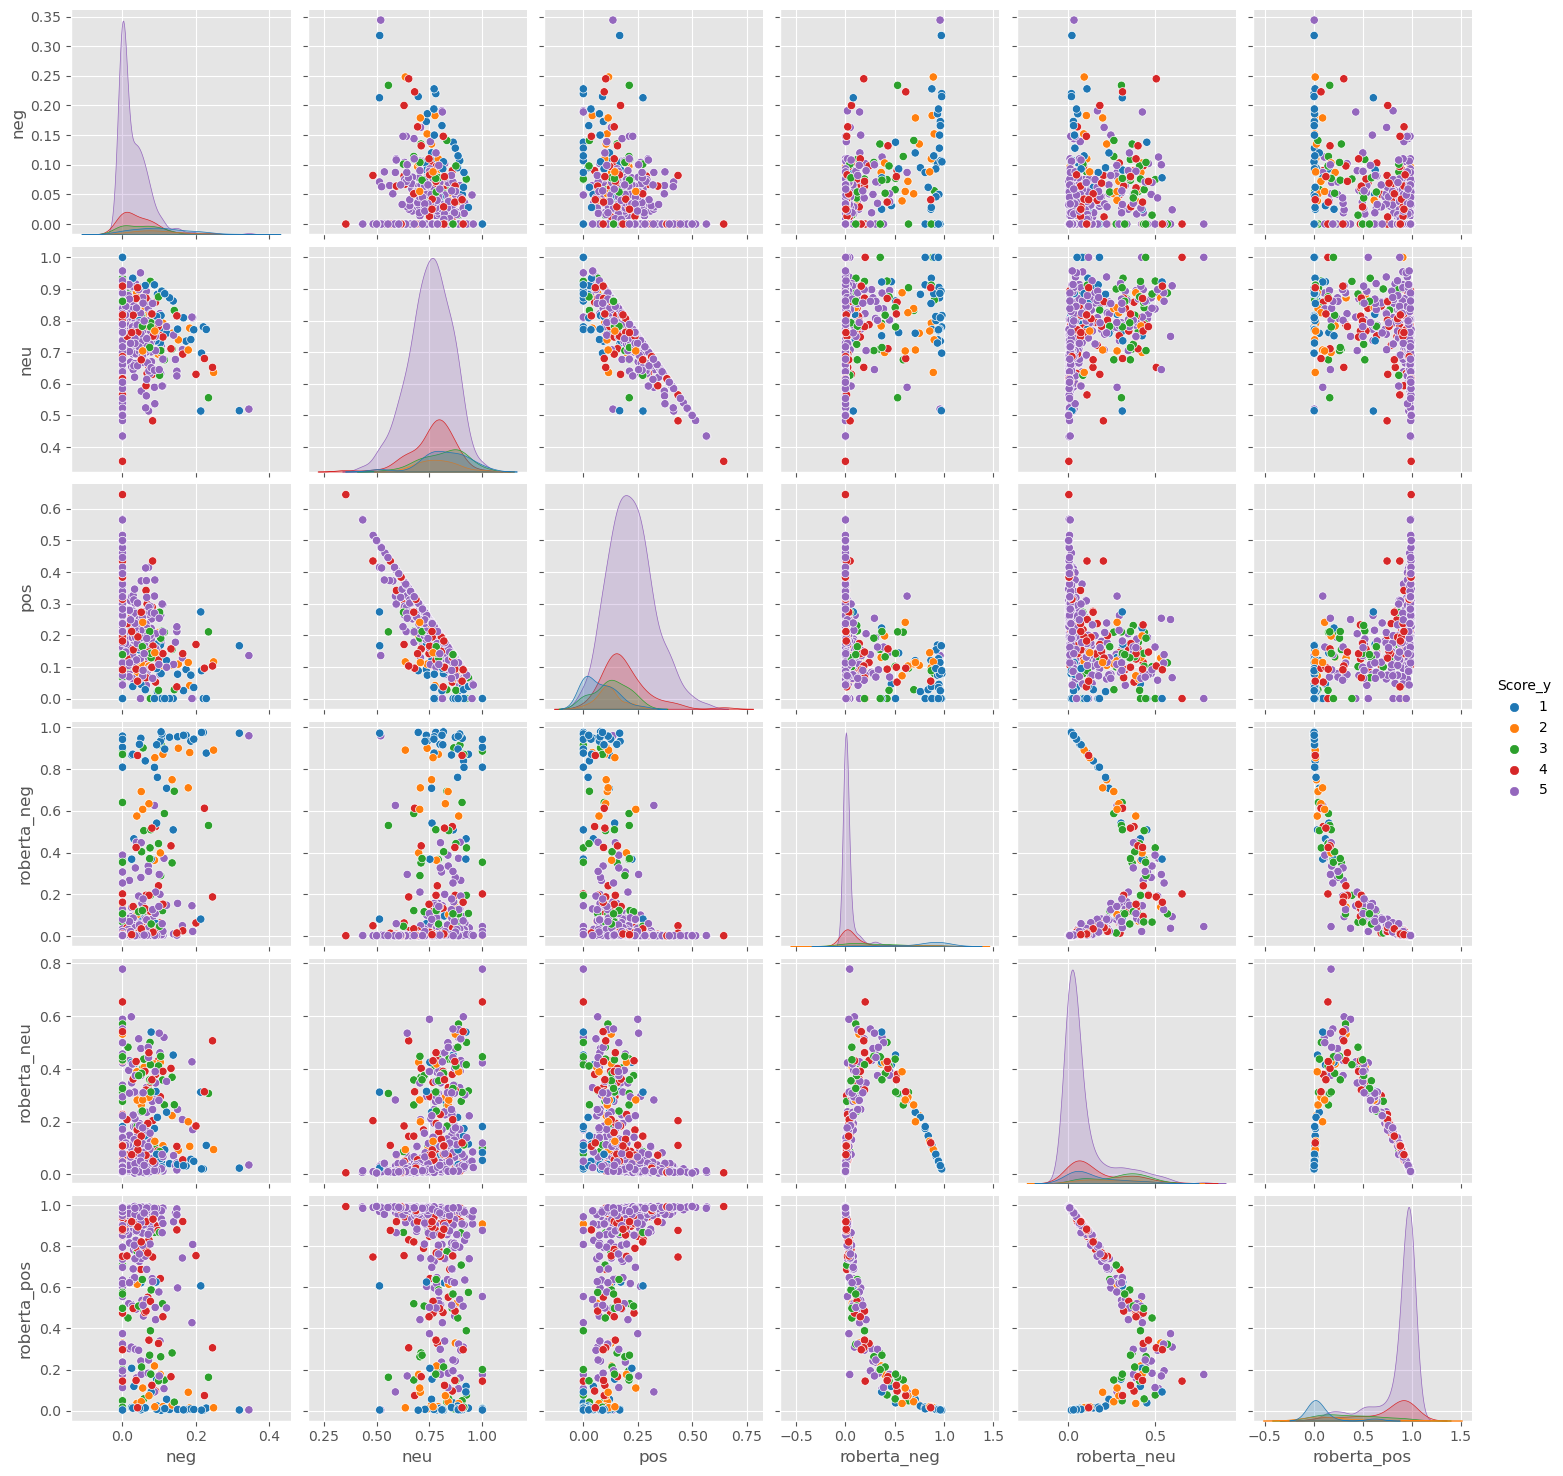

In [82]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score_y',  # Assuming 'ProductId' is the column you want to use for color differentiation
             palette='tab10',
             diag_kind='kde')
